In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io as sio

In [2]:
data = sio.loadmat('NSC')

In [3]:
test = sio.loadmat('NSC.test')

In [4]:
X = data['x'][0]

In [5]:
i = list(range(1,204))

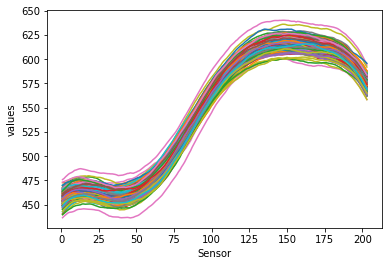

In [6]:
for j in range(0,150):
    plt.plot(i, X[0][j, :])
    plt.xlabel('Sensor')
    plt.ylabel('values')

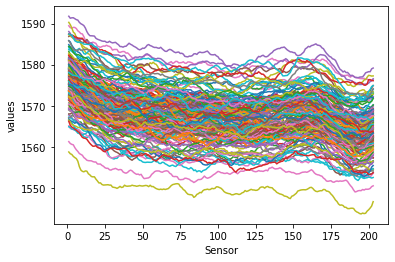

In [7]:
for j in range(0,150):
    plt.plot(i, X[1][j, :])
    plt.xlabel('Sensor')
    plt.ylabel('values')

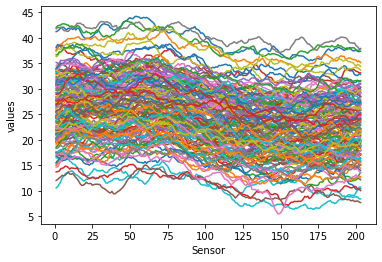

In [8]:
for j in range(0,150):
    plt.plot(i, X[2][j, :])
    plt.xlabel('Sensor')
    plt.ylabel('values')

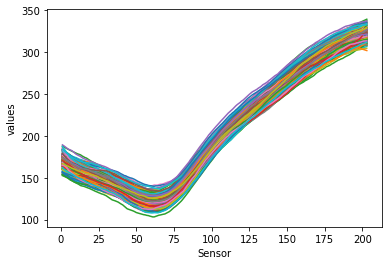

In [9]:
for j in range(0,150):
    plt.plot(i, X[3][j, :])
    plt.xlabel('Sensor')
    plt.ylabel('values')

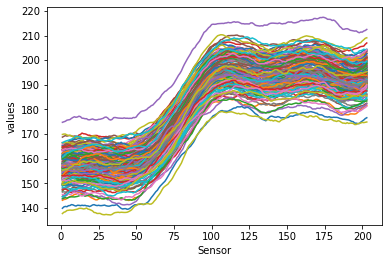

In [10]:
for j in range(0,150):
    plt.plot(i, X[4][j, :])
    plt.xlabel('Sensor')
    plt.ylabel('values')

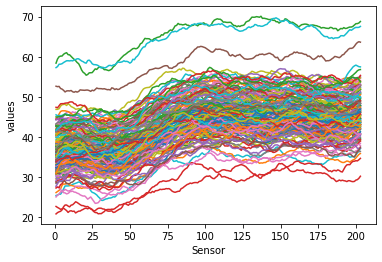

In [11]:
for j in range(0,150):
    plt.plot(i, X[5][j, :])
    plt.xlabel('Sensor')
    plt.ylabel('values')

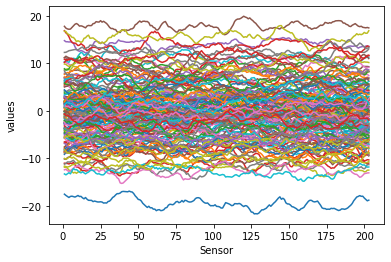

In [12]:
for j in range(0,150):
    plt.plot(i, X[6][j, :])
    plt.xlabel('Sensor')
    plt.ylabel('values')

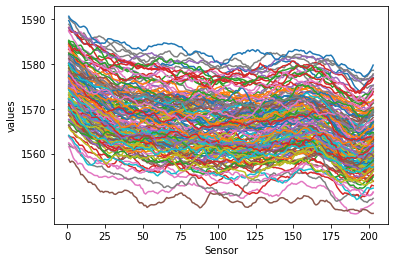

In [13]:
for j in range(0,150):
    plt.plot(i, X[7][j, :])
    plt.xlabel('Sensor')
    plt.ylabel('values')

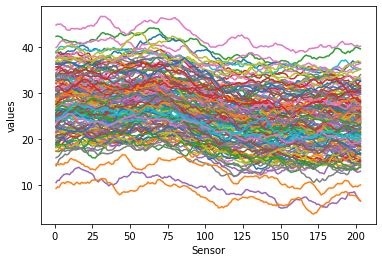

In [14]:
for j in range(0,150):
    plt.plot(i, X[8][j, :])
    plt.xlabel('Sensor')
    plt.ylabel('values')

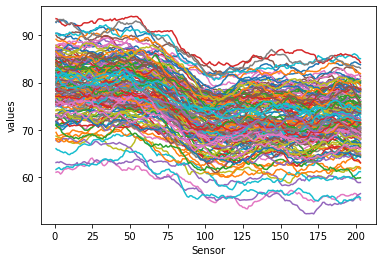

In [15]:
for j in range(0,150):
    plt.plot(i, X[9][j, :])
    plt.xlabel('Sensor')
    plt.ylabel('values')

In [16]:
y= data['y']

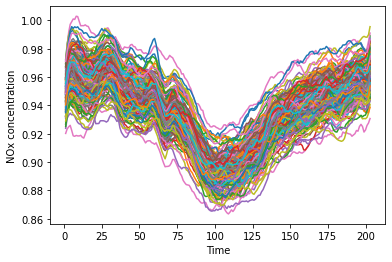

In [17]:
for j in range(0,150):
    plt.plot(i, y[j, :])
    plt.xlabel('Time')
    plt.ylabel('NOx concentration')

In [18]:
knots = np.array(list(range(0,203)))
knots.shape

(203,)

In [19]:
from scipy.interpolate import LSQUnivariateSpline
from scipy.interpolate import UnivariateSpline

In [20]:
u = UnivariateSpline(knots, X[0][0], s = 117)
u_c = u.get_knots()
u_c.shape
u_c

array([  0.,  26.,  51., 101., 114., 127., 152., 202.])

In [21]:
X_coeffs = [[],[],[],[],[],[],[],[],[],[]]

In [22]:

for i in range(0,10):
    for j in range(0,150):
        s = LSQUnivariateSpline(knots, X[i][j], u_c[1:-1])
        X_coeffs[i].append(s.get_coeffs())

In [23]:
X0 = np.vstack(X_coeffs[0])
X1 = np.vstack(X_coeffs[1])
X2 = np.vstack(X_coeffs[2])
X3 = np.vstack(X_coeffs[3])
X4 = np.vstack(X_coeffs[4])
X5 = np.vstack(X_coeffs[5])
X6 = np.vstack(X_coeffs[6])
X7 = np.vstack(X_coeffs[7])
X8 = np.vstack(X_coeffs[8])
X9 = np.vstack(X_coeffs[9])


In [24]:
X_c = np.dstack([X0, X1, X2, X3, X4, X5, X6, X7, X8, X9])

In [25]:
X_c.shape

(150, 10, 10)

In [26]:
Z = X_c.reshape(150, 100)

In [27]:
I = np.identity(10)

In [28]:
from tensorly.tenalg import kronecker

In [29]:
y_coeffs = []
for i in range(0,150):
    s = LSQUnivariateSpline(knots, y[i, :], u_c[1:-1])
    y_coeffs.append(s.get_coeffs())

In [30]:
y_c = np.vstack(y_coeffs)

In [31]:
y_c = y_c.flatten()

In [32]:
y_c.shape

(1500,)

In [33]:
z_x = kronecker((I, Z))

In [35]:
z_x

(1500, 1000)

In [36]:
#pip install group-lasso

Note: you may need to restart the kernel to use updated packages.


In [72]:
group_0 = np.zeros((100, 1))
group_1 = np.ones((100, 1))
group_2 = np.full((100, 1), 2)
group_3 = np.full((100, 1), 3)
group_4 = np.full((100, 1), 4)
group_5 = np.full((100, 1), 5)
group_6 = np.full((100, 1), 6)
group_7 = np.full((100, 1), 7)
group_8 = np.full((100, 1), 8)
group_9 = np.full((100, 1), 9)


In [75]:
group_indx = np.concatenate([group_0, group_1, group_2, group_3, group_4,
                            group_5, group_6, group_7, group_8, group_9])

In [78]:
from pyglmnet import GLMCV
from pyglmnet.datasets import fetch_group_lasso_datasets
import matplotlib.pyplot as plt

In [97]:
gl_glm = GLMCV(tol=1e-3,
               group=group_indx.astype(int), score_metric="pseudo_R2",
               alpha=1.0, learning_rate=3, max_iter=10000, cv=10, verbose=True)

In [98]:
gl_glm.fit(z_x, y_c)

Looping through the regularization path
Lambda: 0.5000


ValueError: all entries of group should be integers

In [ ]:
glm = GLMCV(distr="binomial", tol=1e-3,
            score_metric="pseudo_R2",
            alpha=1.0, learning_rate=3, max_iter=10000, cv=3, verbose=True)

In [ ]:
glm.fit(z_x, y_c)

In [ ]:
group_indx.astype(int)